In [ ]:
from ase.io import read
from ase.build import molecule
from ase import Atoms
from ase.ga.data import DataConnection
from dscribe.descriptors import SOAP
import numpy as np
import pandas as pd

species = ['O', 'Pd']
r_cut = 4.0
n_max = 8
l_max = 6

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=True,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)

# all_Pd4O4 = DataConnection(f"Pd100_Pd4O4/DevHS_data.db").get_all_relaxed_candidates()
all_Pd20O20 = DataConnection(f"Pd100_Pd20O20/DevHS_data.db").get_all_relaxed_candidates()

descriptor_list_1 = []
descriptor_list_2 = []

#for atoms in all_Pd4O4:
#     if atoms.info['key_value_pairs']['raw_score'] < 0:
#         descriptor=soap.create(atoms[-8:])
#         descriptor_list_1.append(descriptor)

for atoms in all_Pd20O20:
    if atoms.info['key_value_pairs']['raw_score'] < 0:
        descriptor=soap.create(atoms)
        descriptor_list_1.append(descriptor)

descriptor_1 = np.array(descriptor_list_1)
# descriptor_2 = np.array(descriptor_list_2)

d:\ProgramData\anaconda3\envs\Filend\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ProgramData\anaconda3\envs\Filend\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\ProgramData\anaconda3\envs\Filend\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ProgramData\anaconda3\envs\Filend\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


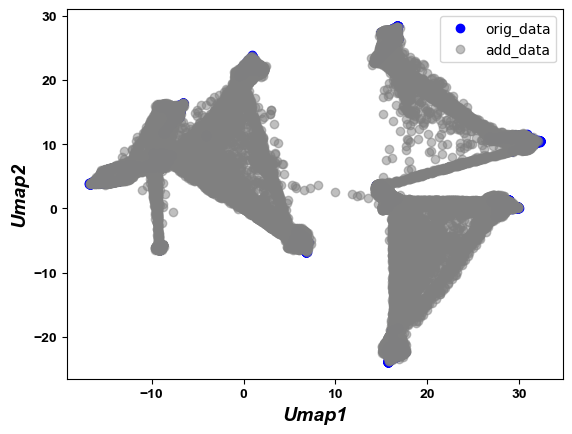

In [ ]:
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# 展平前两维，保留所有特征
descriptor_list_1_flat = descriptor_1.reshape(-1, descriptor_1.shape[-1])
descriptor_list_2_flat = descriptor_2.reshape(-1, descriptor_2.shape[-1])

# UMAP
reducer = UMAP(n_neighbors=100, random_state=42)
reducer.fit(descriptor_list_1_flat)
X_trans = reducer.transform(descriptor_list_1_flat)
add_X_trans = reducer.transform(descriptor_list_2_flat)


plt.plot(add_X_trans[:, 0], add_X_trans[:, 1], 'o', color='grey', label="add_data", alpha=0.2)
plt.plot(X_trans[:, 0], X_trans[:, 1], 'o', color='blue', label="orig_data")
plt.xticks(fontsize=10, fontfamily='Arial', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', fontweight='bold')
plt.xlabel('Umap1', fontsize=14, fontweight='bold', fontstyle='italic', fontfamily='Arial')
plt.ylabel('Umap2', fontsize=14, fontweight='bold', fontstyle='italic', fontfamily='Arial')
plt.legend()
plt.savefig('umap.jpg')
plt.show()